Importing required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()       #loading datasets

In [3]:
len(X_train)

60000

In [4]:
len(x_test)

10000

X_train[0]

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train=X_train/255             #scaling (0-1)
x_test = x_test/255

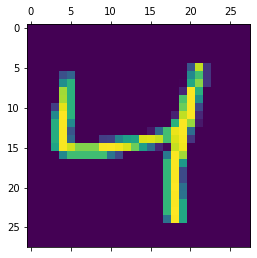

In [7]:
plt.matshow(X_train[2])

In [8]:
x_train_flatten = X_train.reshape(len(X_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [9]:
print(x_train_flatten.shape,x_test_flatten.shape)

(60000, 784) (10000, 784)


In [10]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4688 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9255


In [11]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9258


[0.26783421635627747, 0.9258000254631042]

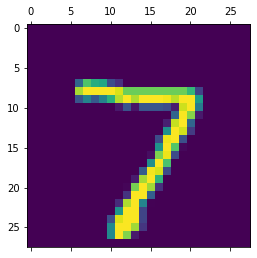

In [12]:
plt.matshow(x_test[0])

In [13]:
y_predicted = model.predict(x_test_flatten)

In [14]:
y_predicted[0]

array([1.95452571e-02, 3.07538642e-07, 6.56431317e-02, 9.62767363e-01,
       2.74360180e-03, 1.33848161e-01, 1.08896506e-06, 9.99782562e-01,
       1.03607476e-01, 5.70366323e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

predicted correctly

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,    9,    3,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    7,  938,   16,    9,    4,   12,    9,   31,    3],
       [   1,    0,   22,  931,    0,   15,    2,   10,   23,    6],
       [   1,    1,    4,    1,  921,    0,   10,    4,   11,   29],
       [   8,    1,    2,   47,   11,  762,   18,    7,   30,    6],
       [   8,    3,    9,    1,    8,    9,  914,    2,    4,    0],
       [   1,    5,   26,    8,    9,    1,    0,  951,    2,   25],
       [   5,    6,    9,   26,    9,   23,   10,   12,  869,    5],
       [  10,    7,    1,   12,   32,    6,    0,   27,    8,  906]])>

Text(69.0, 0.5, 'Truth')

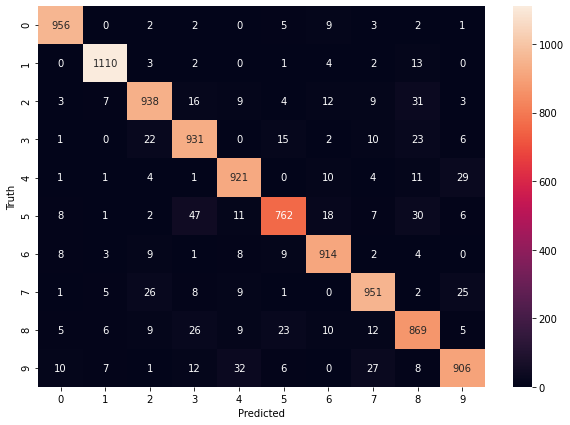

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')    #hidden layer
])
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1245 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0662 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9838


In [20]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 902us/step - loss: 0.0750 - accuracy: 0.9745


[0.07499565929174423, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

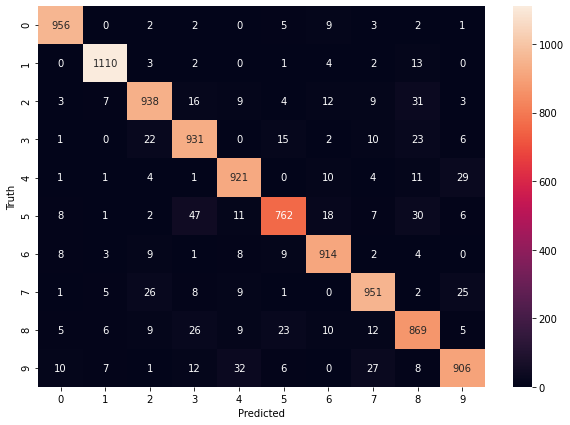

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(10,activation='relu') #hidden layer
])
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5482 - accuracy: 0.1595
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2948 - accuracy: 0.1022
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.0988
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3023 - accuracy: 0.0988
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.0988


In [23]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.3026 - accuracy: 0.0980


[2.30259108543396, 0.09799999743700027]

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(10,activation='relu') #hidden layer
])
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(x_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3702 - accuracy: 0.1376
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2829 - accuracy: 0.1049
Epoch 3/10
1875/1875 [==============================] - 2s 952us/step - loss: 2.2856 - accuracy: 0.1063
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2973 - accuracy: 0.1011
Epoch 5/10
1875/1875 [==============================] - 2s 983us/step - loss: 2.2963 - accuracy: 0.1014
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2985 - accuracy: 0.1006
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - accuracy: 0.0990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2973 - accuracy: 0.1010
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2915 - accuracy: 0.1036
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2

In [25]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 756us/step - loss: 2.3012 - accuracy: 0.0986


[2.3012094497680664, 0.09860000014305115]